In [1]:
import numpy as np
import sklearn, os, sys
from sklearn import svm
from skimage import data, io, filters
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
# local modules
import config, data, image, face_detection
from utils import plot

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
dataset = data.init_dataset()

In [4]:
img_name = '../datasets/train/' + dataset.train[0]
img_name = '../datasets/train/' + '0cbdda18846cd014dcb0e18fa67f3f98.jpg'
# img_name = '../datasets/train/' + '0c19867277e6c96ad8f487b4fe343ff9.jpg'
img_name

'../datasets/train/0cbdda18846cd014dcb0e18fa67f3f98.jpg'

In [5]:
# Note that cv2 uses different formatting than skimage
img = cv2.imread(img_name)
print(img[0][0:3])
img = skimage.io.imread(img_name)
print(img[0][0:3])
type(img)

[[198 182 166]
 [198 182 166]
 [198 182 166]]
[[166 182 198]
 [166 182 198]
 [166 182 198]]


numpy.ndarray

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


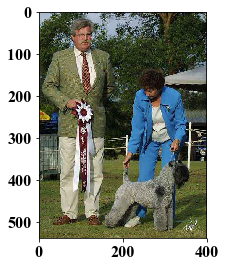

In [6]:
skimage.io.imshow(img_name)

## Face/eye detection
Using the local _face-detection_ module

In [7]:
faces, gray_img = face_detection.detect_faces(img, scale=1.3, nn=2)
eye_dict = face_detection.detect_eyes(gray_img, min_eyes=-1, scale=1.1, nn=1)
real_faces = eye_dict.keys()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


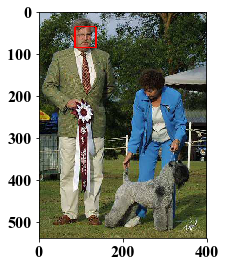

In [8]:
# (optional)
img_ = face_detection.draw_faces(img, faces)
img_ = face_detection.draw_eyes(img_, eye_dict)
# real_faces = draw_rectangles(img,faces,min_eyes=-1)
skimage.io.imshow(img_)

## Remove faces from img

In [11]:
# for every img

for (x,y,w,h) in faces:
    print('f',x,y,w,h)
    (x,y,w,h) = image.extend_coordinates(x,y,w,h,img,scale=1.5,lower=3)
    print(x,y,w,h)

    img = image.add_noise(img,x,y,w,h)

f 85 37 50 50
73 25 75 225


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


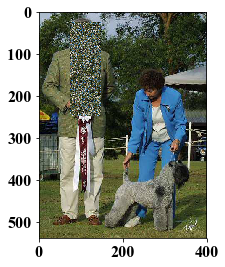

In [12]:
skimage.io.imshow(img)